In [13]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten
import numpy as np

In [14]:
root_dir = '/kaggle/input/mrl-eye-dataset/data/'

train_data_close_eyes = os.listdir(root_dir + 'train/close eyes')
train_data_open_eyes = os.listdir(root_dir + 'train/open eyes')

test_data_close_eyes = os.listdir(root_dir + 'test/close eyes')
test_data_open_eyes = os.listdir(root_dir + 'test/open eyes')

In [15]:
train_label = np.concatenate((np.zeros(len(train_data_close_eyes)), np.ones(len(train_data_open_eyes))))
test_label = np.concatenate((np.zeros(len(test_data_close_eyes)), np.ones(len(test_data_open_eyes))))

In [16]:
IMAGE_SIZE = (64, 64)

def load_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image, channels=1)
  image = tf.image.resize(image, IMAGE_SIZE)
  image = tf.cast(image, tf.float32) / 255.0

  return image

In [17]:
train_images_loaded = []

for image in train_data_close_eyes:
  train_images_loaded.append(load_image(root_dir + 'train/close eyes/' + image))
print('Finish Train Close Eyes')

for image in train_data_open_eyes:
  train_images_loaded.append(load_image(root_dir + 'train/open eyes/' + image))
print('Finish Train Open Eyes')

test_images_loaded = []

for image in test_data_close_eyes:
  test_images_loaded.append(load_image(root_dir + 'test/close eyes/' + image))
print('Finish Test Close Eyes')

for image in test_data_open_eyes:
  test_images_loaded.append(load_image(root_dir + 'test/open eyes/' + image))
print('Finish Test Open Eyes')

Finish Train Close Eyes
Finish Train Open Eyes
Finish Test Close Eyes
Finish Test Open Eyes


In [18]:
train_indices_shuffled = np.random.permutation(len(train_images_loaded))

train_images_loaded = np.array(train_images_loaded)[train_indices_shuffled]
train_label = train_label[train_indices_shuffled]

test_indices_shuffled = np.random.permutation(len(test_images_loaded))

test_images_loaded = np.array(test_images_loaded)[test_indices_shuffled]
test_label = test_label[test_indices_shuffled]

In [19]:
model = tf.keras.models.Sequential([
  Input(shape=(64, 64, 1)),

  Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
  Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
  BatchNormalization(),
  MaxPooling2D(strides = 2),
  Dropout(0.3),

  Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
  Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
  BatchNormalization(),
  MaxPooling2D(strides = 2),
  Dropout(0.3),

  Flatten(),
  Dense(units  = 256, activation = 'relu', use_bias=False),
  BatchNormalization(),

  Dense(units = 128, use_bias=False, activation = 'relu'),

  Dense(units = 84, use_bias=False, activation = 'relu'),
  BatchNormalization(),
  Dropout(0.3),

  Dense(units = 1, activation = 'sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 60, 60, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 32)     │        25,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,359,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 84)             │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 84)             │           336 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,486,437 (9.49 MB)

 Trainable params: 2,485,565 (9.48 MB)

 Non-trainable params: 872 (3.41 KB)

In [20]:
model.fit(
    train_images_loaded,
    train_label,
    epochs=30,
    validation_split=0.2,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=8, monitor='val_accuracy')]
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8958 - loss: 0.2578 - val_accuracy: 0.9638 - val_loss: 0.1153
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9682 - loss: 0.0886 - val_accuracy: 0.9811 - val_loss: 0.0575
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9782 - loss: 0.0658 - val_accuracy: 0.9743 - val_loss: 0.0690
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9822 - loss: 0.0510 - val_accuracy: 0.9846 - val_loss: 0.0422
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9829 - loss: 0.0509 - val_accuracy: 0.9802 - val_loss: 0.0609
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9841 - loss: 0.0436 - val_accuracy: 0.9844 - val_loss: 0.0448
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9874 - loss: 0.0328 - val_accuracy: 0.9873 - val_loss: 0.0387
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9886 - loss: 

In [23]:
predictions = model.predict(test_images_loaded)
predictions = (predictions >= 0.5).astype(int).squeeze()

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      1566
         1.0       1.00      0.85      0.92      1657

    accuracy                           0.92      3223
   macro avg       0.93      0.92      0.92      3223
weighted avg       0.93      0.92      0.92      3223



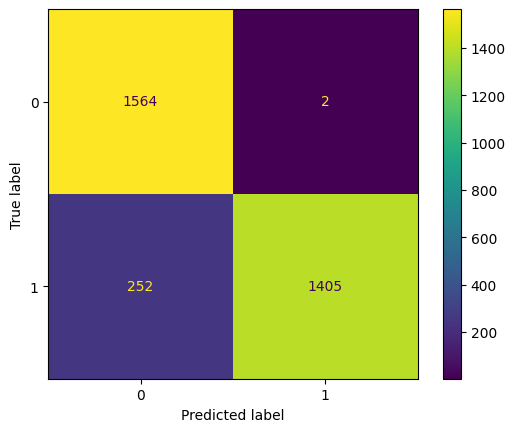

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(test_label, predictions))

cm = confusion_matrix(test_label, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [25]:
model.export('eye_detection_model_export')

Saved artifact at 'eye_detection_model_export'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name='keras_tensor_19')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139024607784528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139024613147568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139024613153200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139024613156016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139024613158128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139024613156192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139024613156368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139024613151264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139024613151968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139024613162000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139

In [26]:
!zip -r eye_detection_model_export.zip /kaggle/working/eye_detection_model_export

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/eye_detection_model_export/ (stored 0%)
  adding: kaggle/working/eye_detection_model_export/fingerprint.pb (stored 0%)
  adding: kaggle/working/eye_detection_model_export/saved_model.pb (deflated 88%)
  adding: kaggle/working/eye_detection_model_export/assets/ (stored 0%)
  adding: kaggle/working/eye_detection_model_export/variables/ (stored 0%)
  adding: kaggle/working/eye_detection_model_export/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: kaggle/working/eye_detection_model_export/variables/variables.index (deflated 69%)
